In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import numpy
import talib
import math
import pandas as pd

In [3]:
df1 = pd.read_csv("AUD_USD_H4.csv")
open_prices = df1['open']
close_prices = df1['close']
high_prices = df1['high']
low_prices = df1['low']

In [4]:
df1

,datetime,open,high,low,close,volume
0,2005-01-02T18:00:00.000000000Z,0.78230,0.78280,0.78060,0.78060,58
1,2005-01-02T22:00:00.000000000Z,0.78070,0.78390,0.78070,0.78155,713
2,2005-01-03T02:00:00.000000000Z,0.78145,0.78165,0.77265,0.77535,1387
3,2005-01-03T06:00:00.000000000Z,0.77535,0.77945,0.77315,0.77835,1598
4,2005-01-03T10:00:00.000000000Z,0.77835,0.78135,0.77615,0.77775,1467
...,...,...,...,...,...,...
24472,2019-12-30T02:00:00.000000000Z,0.69909,0.69992,0.69842,0.69934,593
24473,2019-12-30T06:00:00.000000000Z,0.69930,0.69970,0.69842,0.69962,706
24474,2019-12-30T10:00:00.000000000Z,0.69959,0.69996,0.69896,0.69986,508
24475,2019-12-30T14:00:00.000000000Z,0.69982,0.70046,0.69891,0.70003,867


In [5]:
supported = ["ROCP", "OROCP", "HROCP", "LROCP", "MACD", "RSI", "UO", "BOLL", "MA", "STOCH", "AO", "ROC", "WILLR"]

In [6]:
def extract_by_type(feature_type, open_prices=None, close_prices=None, high_prices=None, low_prices=None):
    if feature_type == 'ROCP':
        rocp1 = talib.ROCP(close_prices, timeperiod=1)
        rocp2 = talib.ROCP(close_prices, timeperiod=2)
        feature.append(rocp1)
        feature.append(rocp2)
    if feature_type == 'OROCP':
        orocp = talib.ROCP(open_prices, timeperiod=1)
        feature.append(orocp)
    if feature_type == 'HROCP':
        hrocp = talib.ROCP(high_prices, timeperiod=1)
        feature.append(hrocp)
    if feature_type == 'LROCP':
        lrocp = talib.ROCP(low_prices, timeperiod=1)
        feature.append(lrocp)
    if feature_type == 'MACD':
        macd, signal, hist = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
        norm_macd = numpy.nan_to_num(macd) / math.sqrt(numpy.var(numpy.nan_to_num(macd)))
        norm_signal = numpy.nan_to_num(signal) / math.sqrt(numpy.var(numpy.nan_to_num(signal)))
        norm_hist = numpy.nan_to_num(hist) / math.sqrt(numpy.var(numpy.nan_to_num(hist)))
        macdrocp = talib.ROCP(norm_macd + numpy.max(norm_macd) - numpy.min(norm_macd), timeperiod=1)
        signalrocp = talib.ROCP(norm_signal + numpy.max(norm_signal) - numpy.min(norm_signal), timeperiod=1)
        histrocp = talib.ROCP(norm_hist + numpy.max(norm_hist) - numpy.min(norm_hist), timeperiod=1)
        # feature.append(macd / 100.0)
        # feature.append(signal / 100.0)
        # feature.append(hist / 100.0)
        feature.append(norm_macd)
        feature.append(norm_signal)
        feature.append(norm_hist)

        feature.append(macdrocp)
        feature.append(signalrocp)
        feature.append(histrocp)
    if feature_type == 'RSI':
        rsi6 = talib.RSI(close_prices, timeperiod=6)
        rsi12 = talib.RSI(close_prices, timeperiod=12)
        rsi24 = talib.RSI(close_prices, timeperiod=24)
        rsi6rocp = talib.ROCP(rsi6 + 100., timeperiod=1)
        rsi12rocp = talib.ROCP(rsi12 + 100., timeperiod=1)
        rsi24rocp = talib.ROCP(rsi24 + 100., timeperiod=1)
        feature.append(rsi6 / 100.0 - 0.5)
        feature.append(rsi12 / 100.0 - 0.5)
        feature.append(rsi24 / 100.0 - 0.5)
        # feature.append(numpy.maximum(rsi6 / 100.0 - 0.8, 0))
        # feature.append(numpy.maximum(rsi12 / 100.0 - 0.8, 0))
        # feature.append(numpy.maximum(rsi24 / 100.0 - 0.8, 0))
        # feature.append(numpy.minimum(rsi6 / 100.0 - 0.2, 0))
        # feature.append(numpy.minimum(rsi6 / 100.0 - 0.2, 0))
        # feature.append(numpy.minimum(rsi6 / 100.0 - 0.2, 0))
        # feature.append(numpy.maximum(numpy.minimum(rsi6 / 100.0 - 0.5, 0.3), -0.3))
        # feature.append(numpy.maximum(numpy.minimum(rsi6 / 100.0 - 0.5, 0.3), -0.3))
        # feature.append(numpy.maximum(numpy.minimum(rsi6 / 100.0 - 0.5, 0.3), -0.3))
        feature.append(rsi6rocp)
        feature.append(rsi12rocp)
        feature.append(rsi24rocp)
    if feature_type == 'UO':
        ult_osc = talib.ULTOSC(high_prices, low_prices, close_prices, timeperiod1=7, timeperiod2=14, timeperiod3=28)
        feature.append(ult_osc / 100.0 - 0.5)
    if feature_type == 'BOLL':
        upperband, middleband, lowerband = talib.BBANDS(close_prices, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
        feature.append((upperband - close_prices) / close_prices)
        feature.append((middleband - close_prices) / close_prices)
        feature.append((lowerband - close_prices) / close_prices)         
    if feature_type == 'MA':
        ma5 = talib.MA(close_prices, timeperiod=5)
        ma10 = talib.MA(close_prices, timeperiod=10)
        ma20 = talib.MA(close_prices, timeperiod=20)
        ma25 = talib.MA(close_prices, timeperiod=25)
        ma30 = talib.MA(close_prices, timeperiod=30)
        ma40 = talib.MA(close_prices, timeperiod=40)
        ma50 = talib.MA(close_prices, timeperiod=50)
        ma60 = talib.MA(close_prices, timeperiod=60)
        #ma360 = talib.MA(close_prices, timeperiod=70)
        #ma720 = talib.MA(close_prices, timeperiod=720)
        ma5rocp = talib.ROCP(ma5, timeperiod=1)
        ma10rocp = talib.ROCP(ma10, timeperiod=1)
        ma20rocp = talib.ROCP(ma20, timeperiod=1)
        ma25rocp = talib.ROCP(ma25, timeperiod=1)
        ma30rocp = talib.ROCP(ma30, timeperiod=1)
        ma40rocp = talib.ROCP(ma40, timeperiod=1)
        ma50rocp = talib.ROCP(ma50, timeperiod=1)
        ma60rocp = talib.ROCP(ma60, timeperiod=1)
        #ma360rocp = talib.ROCP(ma360, timeperiod=1)
        #ma720rocp = talib.ROCP(ma720, timeperiod=1)
        feature.append(ma5rocp)
        feature.append(ma10rocp)
        feature.append(ma20rocp)
        feature.append(ma25rocp)
        feature.append(ma30rocp)
        feature.append(ma40rocp)
        feature.append(ma50rocp)
        feature.append(ma60rocp)
        #feature.append(ma360rocp)
        #feature.append(ma720rocp)
        feature.append((ma5 - close_prices) / close_prices)
        feature.append((ma10 - close_prices) / close_prices)
        feature.append((ma20 - close_prices) / close_prices)
        feature.append((ma25 - close_prices) / close_prices)
        feature.append((ma30 - close_prices) / close_prices)
        feature.append((ma40 - close_prices) / close_prices)
        feature.append((ma50 - close_prices) / close_prices)
        feature.append((ma60 - close_prices) / close_prices)
        #feature.append((ma360 - close_prices) / close_prices)
        #feature.append((ma720 - close_prices) / close_prices)
    if feature_type == 'STOCH':
        slow_stoch_k, slow_stoch_d = talib.STOCH(high_prices ,low_prices ,close_prices ,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
        fast_stoch_k, fast_stoch_d = talib.STOCHF(high_prices , low_prices , close_prices , fastk_period=5, fastd_period=3, fastd_matype=0)
        fast_rsi_k, fast_rsi_d = talib.STOCHRSI(close_prices, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)                      
        feature.append(slow_stoch_k / 100.0 - 0.5)
        feature.append(slow_stoch_d / 100.0 - 0.5)
        feature.append(fast_stoch_k / 100.0 - 0.5)
        feature.append(fast_stoch_d / 100.0 - 0.5)
        feature.append(fast_rsi_k / 100.0 - 0.5)
        feature.append(fast_rsi_d / 100.0 - 0.5)
    if feature_type == 'AO':          
        median_price = (high_prices + low_prices) / 2
        ao = talib.SMA(median_price, 5)-talib.SMA(median_price, 34)          
        feature.append(ao)
    if feature_type == 'ROC':
        roc5 = talib.ROC(close_prices, timeperiod=5)
        roc10 = talib.ROC(close_prices, timeperiod=10)
        roc20 = talib.ROC(close_prices, timeperiod=20)
        roc25 = talib.ROC(close_prices, timeperiod=25)
        feature.append(roc5)
        feature.append(roc10)
        feature.append(roc20)
        feature.append(roc25)
    if feature_type == 'WILLR':
        willr = talib.WILLR(high_prices,low_prices,close_prices, timeperiod=14)
        feature.append(willr / 100.0 - 0.5)

    return feature

In [7]:
list_is = ["ROCP1", "ROCP2", "OROCP", "HROCP", "LROCP", "norm_macd", "norm_signal", "norm_hist", "macdrocp", "singalrocp", "histrocp",
            "rsi6", "rsi12", "rsi24", "rsi6rocp", "rsi12rocp", "rsi24rocp", "UO", "upperBOLL", "middleBOLL",
            "lowerBOLL", "MA5", "MA10", "MA20", "MA30", "MA60", "MA90", "MA120", "MA180",
            "MA5rocp", "MA10rocp", "MA20rocp", "MA30rocp", "MA60rocp", "MA90rocp", "MA120rocp", "MA180rocp", "Slow_stochk", 
            "Slow_stochd", "Fast_stochk", "Fast_stochd", "Fast_stoch_rsik", "Fast_stoch_rsid", "AO","ROC5", "ROC10", "ROC20",
            "ROC25", "WILLR"]
len(list_is)

49

In [8]:
feature = []
for i in supported:
    extract_by_type(i, open_prices=open_prices, close_prices=close_prices, high_prices=high_prices, low_prices=low_prices)

In [9]:
feature

[0             NaN
 1        0.001217
 2       -0.007933
 3        0.003869
 4       -0.000771
            ...   
 24472    0.000315
 24473    0.000400
 24474    0.000343
 24475    0.000243
 24476   -0.000857
 Length: 24477, dtype: float64,
 0             NaN
 1             NaN
 2       -0.006726
 3       -0.004094
 4        0.003095
            ...   
 24472    0.001489
 24473    0.000715
 24474    0.000744
 24475    0.000586
 24476   -0.000614
 Length: 24477, dtype: float64,
 0             NaN
 1       -0.002045
 2        0.000961
 3       -0.007806
 4        0.003869
            ...   
 24472    0.002251
 24473    0.000300
 24474    0.000415
 24475    0.000329
 24476    0.000343
 Length: 24477, dtype: float64,
 0             NaN
 1        0.001405
 2       -0.002870
 3       -0.002815
 4        0.002438
            ...   
 24472    0.000972
 24473   -0.000314
 24474    0.000372
 24475    0.000714
 24476   -0.000300
 Length: 24477, dtype: float64,
 0             NaN
 1        0.00012

In [10]:
df = pd.DataFrame(feature)

In [11]:
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001217,NaN,-0.002045,0.001405,0.000128,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.007933,-0.006726,0.000961,-0.002870,-0.010311,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.003869,-0.004094,-0.007806,-0.002815,0.000647,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.000771,0.003095,0.003869,0.002438,0.003880,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24472,0.000315,0.001489,0.002251,0.000972,0.001290,0.790957,0.680846,0.500482,0.002742,0.002941,...,0.357494,0.410823,0.5,0.500000,0.005432,0.502989,0.900303,1.024196,1.224525,-0.571960
24473,0.000400,0.000715,0.000300,-0.000314,0.000000,0.820486,0.718567,0.480026,0.002057,0.002812,...,0.412281,0.414505,0.5,0.500000,0.005536,0.352860,0.815609,1.162555,1.311979,-0.538860
24474,0.000343,0.000744,0.000415,0.000372,0.000773,0.840944,0.753079,0.439196,0.001422,0.002566,...,0.462687,0.410820,0.5,0.500000,0.005600,0.332597,0.760172,1.182628,1.182628,-0.512887
24475,0.000243,0.000586,0.000329,0.000714,-0.000072,0.852115,0.783056,0.381485,0.000776,0.002223,...,0.353741,0.409570,0.5,0.500000,0.005626,0.247745,0.738236,1.217449,1.207206,-0.552058


In [12]:
df.columns = ["ROCP1", "ROCP2", "OROCP", "HROCP", "LROCP", "norm_macd", "norm_signal", "norm_hist", "macdrocp", "singalrocp", "histrocp",
            "rsi6", "rsi12", "rsi24", "rsi6rocp", "rsi12rocp", "rsi24rocp", "UO", "upperBOLL", "middleBOLL",
            "lowerBOLL", "MA5", "MA10", "MA20", "MA30", "MA60", "MA90", "MA120", "MA180",
            "MA5rocp", "MA10rocp", "MA20rocp", "MA30rocp", "MA60rocp", "MA90rocp", "MA120rocp", "MA180rocp", "Slow_stochk", 
            "Slow_stochd", "Fast_stochk", "Fast_stochd", "Fast_stoch_rsik", "Fast_stoch_rsid", "AO","ROC5", "ROC10", "ROC20",
            "ROC25", "WILLR"]
df.insert(0,"close",close_prices)
df.insert(0,"low",low_prices)
df.insert(0,"high",high_prices)
df.insert(0,"open",open_prices)

In [14]:
df1

,datetime,open,high,low,close,volume
0,2005-01-02T18:00:00.000000000Z,0.78230,0.78280,0.78060,0.78060,58
1,2005-01-02T22:00:00.000000000Z,0.78070,0.78390,0.78070,0.78155,713
2,2005-01-03T02:00:00.000000000Z,0.78145,0.78165,0.77265,0.77535,1387
3,2005-01-03T06:00:00.000000000Z,0.77535,0.77945,0.77315,0.77835,1598
4,2005-01-03T10:00:00.000000000Z,0.77835,0.78135,0.77615,0.77775,1467
...,...,...,...,...,...,...
24472,2019-12-30T02:00:00.000000000Z,0.69909,0.69992,0.69842,0.69934,593
24473,2019-12-30T06:00:00.000000000Z,0.69930,0.69970,0.69842,0.69962,706
24474,2019-12-30T10:00:00.000000000Z,0.69959,0.69996,0.69896,0.69986,508
24475,2019-12-30T14:00:00.000000000Z,0.69982,0.70046,0.69891,0.70003,867


In [13]:
import pandas as pd
import pickle 
import numpy as np
from tqdm import tqdm_notebook as tqdm
from IPython.core.interactiveshell import InteractiveShell

df = df.dropna()
df = df.reset_index()
df.drop(['index'],axis=1)
df = df.drop(['index'],axis=1)
df

,open,high,low,close,ROCP1,ROCP2,OROCP,HROCP,LROCP,norm_macd,...,Fast_stochk,Fast_stochd,Fast_stoch_rsik,Fast_stoch_rsid,AO,ROC5,ROC10,ROC20,ROC25,WILLR
0,0.75890,0.76120,0.75670,0.75880,-0.000132,-0.001710,-0.001579,-0.001181,-0.002242,-0.284169,...,-0.269231,-0.246976,-0.339727,-0.347973,-0.001272,-0.875245,-1.094891,-0.472193,-0.210416,-1.248299
1,0.75860,0.75980,0.75760,0.75880,0.000000,-0.000132,-0.000395,-0.001839,0.001189,-0.349012,...,-0.137931,-0.233205,-0.180366,-0.309494,-0.002100,-0.472193,-1.043297,-0.459137,-0.092166,-1.339695
2,0.75900,0.76010,0.75900,0.75950,0.000923,0.000923,0.000527,0.000395,0.001848,-0.376376,...,0.018519,-0.129548,0.389372,-0.043574,-0.002104,0.105444,-0.796761,-0.445668,0.264026,-1.266667
3,0.75950,0.76030,0.75780,0.75960,0.000132,0.001054,0.000659,0.000263,-0.001581,-0.390745,...,0.037037,-0.027458,0.500000,0.236335,-0.002015,-0.065781,-0.951884,-0.262605,0.013167,-1.258333
4,0.75960,0.76130,0.75950,0.76100,0.001843,0.001975,0.000132,0.001315,0.002243,-0.358627,...,0.434783,0.163446,0.500000,0.463124,-0.002102,0.276716,-0.730498,0.039437,-0.026274,-1.126087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24412,0.69909,0.69992,0.69842,0.69934,0.000315,0.001489,0.002251,0.000972,0.001290,0.790957,...,0.357494,0.410823,0.500000,0.500000,0.005432,0.502989,0.900303,1.024196,1.224525,-0.571960
24413,0.69930,0.69970,0.69842,0.69962,0.000400,0.000715,0.000300,-0.000314,0.000000,0.820486,...,0.412281,0.414505,0.500000,0.500000,0.005536,0.352860,0.815609,1.162555,1.311979,-0.538860
24414,0.69959,0.69996,0.69896,0.69986,0.000343,0.000744,0.000415,0.000372,0.000773,0.840944,...,0.462687,0.410820,0.500000,0.500000,0.005600,0.332597,0.760172,1.182628,1.182628,-0.512887
24415,0.69982,0.70046,0.69891,0.70003,0.000243,0.000586,0.000329,0.000714,-0.000072,0.852115,...,0.353741,0.409570,0.500000,0.500000,0.005626,0.247745,0.738236,1.217449,1.207206,-0.552058


In [15]:
def create_labels(df, col_name, window_size=11):
    """
    Data is labeled as per the logic in research paper
    Label code : BUY => 1, SELL => 0, HOLD => 2
    params :
        df => Dataframe with data
        col_name => name of column which should be used to determine strategy
    returns : numpy array with integer codes for labels with
              size = total-(window_size)+1
    """

    row_counter = 0
    total_rows = len(df)
    labels = np.zeros(total_rows)
    labels[:] = np.nan
    print("Calculating labels")
    pbar = tqdm(total=total_rows)

    while row_counter < total_rows:
        if row_counter >= window_size - 1:
            window_begin = row_counter - (window_size - 1)
            window_end = row_counter
            window_middle = (window_begin + window_end) / 2

            min_ = np.inf
            min_index = -1
            max_ = -np.inf
            max_index = -1
            for i in range(window_begin, window_end + 1):
                price = df.iloc[i][col_name]
                if price < min_:
                    min_ = price
                    min_index = i
                if price > max_:
                    max_ = price
                    max_index = i

            if max_index == window_middle:
                labels[row_counter] = 0
            elif min_index == window_middle:
                labels[row_counter] = 1
            else:
                labels[row_counter] = 2

        row_counter = row_counter + 1
        pbar.update(1)

    pbar.close()
    return labels

df['labels'] = create_labels(df, 'close')
df

Calculating labels


C:\Users\kohli\anaconda3\lib\site-packages\ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


,open,high,low,close,ROCP1,ROCP2,OROCP,HROCP,LROCP,norm_macd,...,Fast_stochd,Fast_stoch_rsik,Fast_stoch_rsid,AO,ROC5,ROC10,ROC20,ROC25,WILLR,labels
0,0.75890,0.76120,0.75670,0.75880,-0.000132,-0.001710,-0.001579,-0.001181,-0.002242,-0.284169,...,-0.246976,-0.339727,-0.347973,-0.001272,-0.875245,-1.094891,-0.472193,-0.210416,-1.248299,NaN
1,0.75860,0.75980,0.75760,0.75880,0.000000,-0.000132,-0.000395,-0.001839,0.001189,-0.349012,...,-0.233205,-0.180366,-0.309494,-0.002100,-0.472193,-1.043297,-0.459137,-0.092166,-1.339695,NaN
2,0.75900,0.76010,0.75900,0.75950,0.000923,0.000923,0.000527,0.000395,0.001848,-0.376376,...,-0.129548,0.389372,-0.043574,-0.002104,0.105444,-0.796761,-0.445668,0.264026,-1.266667,NaN
3,0.75950,0.76030,0.75780,0.75960,0.000132,0.001054,0.000659,0.000263,-0.001581,-0.390745,...,-0.027458,0.500000,0.236335,-0.002015,-0.065781,-0.951884,-0.262605,0.013167,-1.258333,NaN
4,0.75960,0.76130,0.75950,0.76100,0.001843,0.001975,0.000132,0.001315,0.002243,-0.358627,...,0.163446,0.500000,0.463124,-0.002102,0.276716,-0.730498,0.039437,-0.026274,-1.126087,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24412,0.69909,0.69992,0.69842,0.69934,0.000315,0.001489,0.002251,0.000972,0.001290,0.790957,...,0.410823,0.500000,0.500000,0.005432,0.502989,0.900303,1.024196,1.224525,-0.571960,2.0
24413,0.69930,0.69970,0.69842,0.69962,0.000400,0.000715,0.000300,-0.000314,0.000000,0.820486,...,0.414505,0.500000,0.500000,0.005536,0.352860,0.815609,1.162555,1.311979,-0.538860,2.0
24414,0.69959,0.69996,0.69896,0.69986,0.000343,0.000744,0.000415,0.000372,0.000773,0.840944,...,0.410820,0.500000,0.500000,0.005600,0.332597,0.760172,1.182628,1.182628,-0.512887,2.0
24415,0.69982,0.70046,0.69891,0.70003,0.000243,0.000586,0.000329,0.000714,-0.000072,0.852115,...,0.409570,0.500000,0.500000,0.005626,0.247745,0.738236,1.217449,1.207206,-0.552058,2.0


In [16]:
df = df.dropna()
df = df.reset_index()
df.drop(['index'],axis=1)
df = df.drop(['index'],axis=1)
df

,open,high,low,close,ROCP1,ROCP2,OROCP,HROCP,LROCP,norm_macd,...,Fast_stochd,Fast_stoch_rsik,Fast_stoch_rsid,AO,ROC5,ROC10,ROC20,ROC25,WILLR,labels
0,0.75200,0.75340,0.75090,0.75310,0.001463,-0.006333,-0.007654,-0.005806,-0.001064,-0.730065,...,-0.377670,-0.288575,-0.429525,-0.004606,-0.777339,-0.751186,-1.837852,-0.933965,-1.310345,2.0
1,0.75310,0.75390,0.75050,0.75260,-0.000664,0.000798,0.001463,0.000664,-0.000533,-0.820441,...,-0.343902,-0.271478,-0.353351,-0.005847,-1.012758,-0.817080,-1.851852,-0.436566,-1.318966,2.0
2,0.75270,0.75750,0.75240,0.75690,0.005714,0.005046,-0.000531,0.004775,0.002532,-0.762349,...,-0.093449,0.500000,-0.020018,-0.006538,-0.184623,-0.342330,-1.136364,-0.942285,-0.948276,2.0
3,0.75690,0.75890,0.75390,0.75760,0.000925,0.006644,0.005580,0.001848,0.001994,-0.688685,...,0.111909,0.500000,0.242841,-0.006763,-0.039583,-0.263296,-1.212674,-1.289902,-0.882609,2.0
4,0.75760,0.75850,0.75520,0.75540,-0.002904,-0.001982,0.000925,-0.000527,0.001724,-0.684289,...,0.236353,0.180553,0.393518,-0.006183,0.452128,-0.735874,-1.460997,-1.499544,-1.073913,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24402,0.69909,0.69992,0.69842,0.69934,0.000315,0.001489,0.002251,0.000972,0.001290,0.790957,...,0.410823,0.500000,0.500000,0.005432,0.502989,0.900303,1.024196,1.224525,-0.571960,2.0
24403,0.69930,0.69970,0.69842,0.69962,0.000400,0.000715,0.000300,-0.000314,0.000000,0.820486,...,0.414505,0.500000,0.500000,0.005536,0.352860,0.815609,1.162555,1.311979,-0.538860,2.0
24404,0.69959,0.69996,0.69896,0.69986,0.000343,0.000744,0.000415,0.000372,0.000773,0.840944,...,0.410820,0.500000,0.500000,0.005600,0.332597,0.760172,1.182628,1.182628,-0.512887,2.0
24405,0.69982,0.70046,0.69891,0.70003,0.000243,0.000586,0.000329,0.000714,-0.000072,0.852115,...,0.409570,0.500000,0.500000,0.005626,0.247745,0.738236,1.217449,1.207206,-0.552058,2.0


In [17]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from collections import Counter

In [18]:
list_features = list(df.loc[:, 'open':'WILLR'].columns)
print('Total number of features', len(list_features))

Total number of features 53


In [19]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, 'open':'WILLR'].values, df['labels'].values, train_size=0.8, 
                                                    test_size=0.1, shuffle=False)

In [20]:
x_test.size/x_train.size*100

12.50192061459667

In [21]:
train_split = 0.8
print('train_split =',train_split)

train_split = 0.8


In [22]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, train_size=0.8, test_size=1-train_split, 
                                                shuffle=False)

In [23]:
x_train.shape

(15620, 53)

In [24]:
x_train.shape

(15620, 53)

In [25]:

mm_scaler = MinMaxScaler(feature_range=(0, 1)) # or StandardScaler?
mm_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
x_train1 = mm_scaler.fit_transform(x_train)
x_train1

array([[0.29835819, 0.28905373, 0.29794378, ..., 0.48079982, 0.53032305,
        0.18965517],
       [0.30053671, 0.29005613, 0.2971491 , ..., 0.48025299, 0.54968263,
        0.18103448],
       [0.29974452, 0.29727346, 0.30092381, ..., 0.50819957, 0.52999921,
        0.55172414],
       ...,
       [0.64379221, 0.63901363, 0.64549518, ..., 0.5453123 , 0.57062369,
        0.71890799],
       [0.64565385, 0.63893344, 0.64768054, ..., 0.54884064, 0.57070746,
        0.82548794],
       [0.64549542, 0.64021652, 0.64811761, ..., 0.55490106, 0.57259574,
        0.91618829]])

In [27]:
x_train

array([[ 0.752     ,  0.7534    ,  0.7509    , ..., -1.83785193,
        -0.93396475, -1.31034483],
       [ 0.7531    ,  0.7539    ,  0.7505    , ..., -1.85185185,
        -0.43656568, -1.31896552],
       [ 0.7527    ,  0.7575    ,  0.7524    , ..., -1.13636364,
        -0.94228504, -0.94827586],
       ...,
       [ 0.92642   ,  0.92796   ,  0.92584   , ..., -0.1862037 ,
         0.10146586, -0.78109201],
       [ 0.92736   ,  0.92792   ,  0.92694   , ..., -0.09587108,
         0.10361799, -0.67451206],
       [ 0.92728   ,  0.92856   ,  0.92716   , ...,  0.05928769,
         0.1521331 , -0.58381171]])

In [77]:
y_train

array([2., 2., 2., ..., 2., 0., 2.])

In [28]:
# smote = RandomOverSampler(random_state=42, sampling_strategy='not majority')
# x_train, y_train = smote.fit_resample(x_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_train))

x_train = mm_scaler.fit_transform(x_train)
x_cv = mm_scaler.transform(x_cv)
x_test = mm_scaler.transform(x_test)

x_main = x_train.copy()
print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

Shape of x, y train/cv/test (15620, 53) (15620,) (3905, 53) (3905,) (2441, 53) (2441,)


In [29]:
num_features = 49  # should be a perfect square
selection_method = 'all'
topk = 53 if selection_method == 'all' else num_features

In [30]:
%%time
from operator import itemgetter
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

if selection_method == 'traderbot' or selection_method == 'all':
    select_k_best = SelectKBest(f_classif, k=topk)
    if selection_method != 'all':
        x_train = select_k_best.fit_transform(x_main, y_train)
        x_cv = select_k_best.transform(x_cv)
        x_test = select_k_best.transform(x_test)
    else:
        select_k_best.fit(x_main, y_train)
    
    selected_features_traderbot = itemgetter(*select_k_best.get_support(indices=True))(list_features)
    print(selected_features_traderbot)
    print(select_k_best.get_support(indices=True))
    print("****************************************")
    
if selection_method == 'mutual_info' or selection_method == 'all':
    select_k_best = SelectKBest(mutual_info_classif, k=topk)
    if selection_method != 'all':
        x_train = select_k_best.fit_transform(x_main, y_train)
        x_cv = select_k_best.transform(x_cv)
        x_test = select_k_best.transform(x_test)
    else:
        select_k_best.fit(x_main, y_train)

    selected_features_mic = itemgetter(*select_k_best.get_support(indices=True))(list_features)
    print(len(selected_features_mic), selected_features_mic)
    print(select_k_best.get_support(indices=True))

('open', 'high', 'low', 'close', 'ROCP1', 'ROCP2', 'OROCP', 'HROCP', 'LROCP', 'norm_macd', 'norm_signal', 'norm_hist', 'macdrocp', 'singalrocp', 'histrocp', 'rsi6', 'rsi12', 'rsi24', 'rsi6rocp', 'rsi12rocp', 'rsi24rocp', 'UO', 'upperBOLL', 'middleBOLL', 'lowerBOLL', 'MA5', 'MA10', 'MA20', 'MA30', 'MA60', 'MA90', 'MA120', 'MA180', 'MA5rocp', 'MA10rocp', 'MA20rocp', 'MA30rocp', 'MA60rocp', 'MA90rocp', 'MA120rocp', 'MA180rocp', 'Slow_stochk', 'Slow_stochd', 'Fast_stochk', 'Fast_stochd', 'Fast_stoch_rsik', 'Fast_stoch_rsid', 'AO', 'ROC5', 'ROC10', 'ROC20', 'ROC25', 'WILLR')
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
****************************************
53 ('open', 'high', 'low', 'close', 'ROCP1', 'ROCP2', 'OROCP', 'HROCP', 'LROCP', 'norm_macd', 'norm_signal', 'norm_hist', 'macdrocp', 'singalrocp', 'histrocp', 'rsi6', 'rsi12', 'rsi24', 'rsi6rocp', 'rsi12rocp', 'rsi24ro

In [31]:
if selection_method == 'all':
    common = list(set(selected_features_traderbot).intersection(selected_features_mic))
    print("common selected features", len(common), common)
    if len(common) < num_features:
        raise Exception('number of common features found {} < {} required features. Increase "topk variable"'.format(len(common), num_features))
    feat_idx = []
    for c in common:
        feat_idx.append(list_features.index(c))
    feat_idx = sorted(feat_idx[0:49])
    print(feat_idx)

common selected features 53 ['norm_signal', 'norm_hist', 'ROC10', 'rsi12', 'WILLR', 'histrocp', 'MA90rocp', 'Fast_stoch_rsid', 'rsi24rocp', 'MA90', 'norm_macd', 'MA20', 'Slow_stochd', 'ROCP1', 'close', 'Slow_stochk', 'MA30', 'MA20rocp', 'MA5rocp', 'rsi12rocp', 'macdrocp', 'AO', 'ROC5', 'Fast_stochd', 'MA120rocp', 'OROCP', 'MA60', 'MA60rocp', 'Fast_stochk', 'upperBOLL', 'MA30rocp', 'singalrocp', 'rsi6', 'MA5', 'MA120', 'UO', 'ROC25', 'ROC20', 'MA10', 'MA180', 'rsi24', 'low', 'MA180rocp', 'rsi6rocp', 'HROCP', 'open', 'Fast_stoch_rsik', 'high', 'ROCP2', 'MA10rocp', 'LROCP', 'lowerBOLL', 'middleBOLL']
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [32]:
if selection_method == 'all':
    x_train = x_train[:, feat_idx]
    x_cv = x_cv[:, feat_idx]
    x_test = x_test[:, feat_idx]

print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, 
                                                             y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

Shape of x, y train/cv/test (15620, 49) (15620,) (3905, 49) (3905,) (2441, 49) (2441,)


In [33]:
_labels, _counts = np.unique(y_train, return_counts=True)
print("percentage of class 0 = {}, class 1 = {}".format(_counts[0]/len(y_train) * 100, _counts[1]/len(y_train) * 100))

percentage of class 0 = 5.985915492957746, class 1 = 6.101152368758003


In [34]:
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

def get_sample_weights(y):
    """
    calculate the sample weights based on class weights. Used for models with
    imbalanced data and one hot encoding prediction.

    params:
        y: class labels as integers
    """

    y = y.astype(int)  # compute_class_weight needs int labels
    class_weights = compute_class_weight('balanced', np.unique(y), y)
    
    print("real class weights are {}".format(class_weights), np.unique(y))
    print("value_counts", np.unique(y, return_counts=True))
    sample_weights = y.copy().astype(float)
    for i in np.unique(y):
        sample_weights[sample_weights == i] = class_weights[i]  # if i == 2 else 0.8 * class_weights[i]
        # sample_weights = np.where(sample_weights == i, class_weights[int(i)], y_)

    return sample_weights

def reshape_as_image(x, img_width, img_height):
    x_temp = np.zeros((len(x), img_height, img_width))
    for i in range(x.shape[0]):
        # print(type(x), type(x_temp), x.shape)
        x_temp[i] = np.reshape(x[i], (img_height, img_width))

    return x_temp

def f1_weighted(y_true, y_pred):
    y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)  # can use conf_mat[0, :], tf.slice()
    # precision = TP/TP+FP, recall = TP/TP+FN
    rows, cols = conf_mat.get_shape()
    size = y_true_class.get_shape()[0]
    precision = tf.constant([0, 0, 0])  # change this to use rows/cols as size
    recall = tf.constant([0, 0, 0])
    class_counts = tf.constant([0, 0, 0])

    def get_precision(i, conf_mat):
        print("prec check", conf_mat, conf_mat[i, i], tf.reduce_sum(conf_mat[:, i]))
        precision[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[:, i]))
        recall[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[i, :]))
        tf.add(i, 1)
        return i, conf_mat, precision, recall

    def tf_count(i):
        elements_equal_to_value = tf.equal(y_true_class, i)
        as_ints = tf.cast(elements_equal_to_value, tf.int32)
        count = tf.reduce_sum(as_ints)
        class_counts[i].assign(count)
        tf.add(i, 1)
        return count

    def condition(i, conf_mat):
        return tf.less(i, 3)

    i = tf.constant(3)
    i, conf_mat = tf.while_loop(condition, get_precision, [i, conf_mat])

    i = tf.constant(3)
    c = lambda i: tf.less(i, 3)
    b = tf_count(i)
    tf.while_loop(c, b, [i])

    weights = tf.math.divide(class_counts, size)
    numerators = tf.math.multiply(tf.math.multiply(precision, recall), tf.constant(2))
    denominators = tf.math.add(precision, recall)
    f1s = tf.math.divide(numerators, denominators)
    weighted_f1 = tf.reduce_sum(f.math.multiply(f1s, weights))
    return weighted_f1

def f1_metric(y_true, y_pred):
    """
    this calculates precision & recall 
    """

    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))  # mistake: y_pred of 0.3 is also considered 1
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    # y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    # y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    # conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)
    # tf.Print(conf_mat, [conf_mat], "confusion_matrix")

    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

get_custom_objects().update({"f1_metric": f1_metric, "f1_weighted": f1_weighted})

In [35]:
sample_weights = get_sample_weights(y_train)
print("Test sample_weights:", sample_weights)

real class weights are [5.56862745 5.46344876 0.37916303] [0 1 2]
value_counts (array([0, 1, 2]), array([  935,   953, 13732], dtype=int64))
Test sample_weights: [0.37916303 0.37916303 0.37916303 ... 0.37916303 5.56862745 0.37916303]


In [36]:
one_hot_enc = OneHotEncoder(sparse=False, categories='auto')  # , categories='auto'
y_train = one_hot_enc.fit_transform(y_train.reshape(-1, 1))
print("y_train",y_train.shape)
y_cv = one_hot_enc.transform(y_cv.reshape(-1, 1))
y_test = one_hot_enc.transform(y_test.reshape(-1, 1))

y_train (15620, 3)


In [37]:
print("y_test",y_test.shape)

y_test (2441, 3)


In [38]:
dim = int(np.sqrt(num_features))
x_train = reshape_as_image(x_train, dim, dim)
x_cv = reshape_as_image(x_cv, dim, dim)
x_test = reshape_as_image(x_test, dim, dim)
# adding a 1-dim for channels (3)
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)
x_cv = np.stack((x_cv,) * 3, axis=-1)
print("final shape of x, y train/test {} {} {} {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

final shape of x, y train/test (15620, 7, 7, 3) (15620, 3) (2441, 7, 7, 3) (2441, 3)


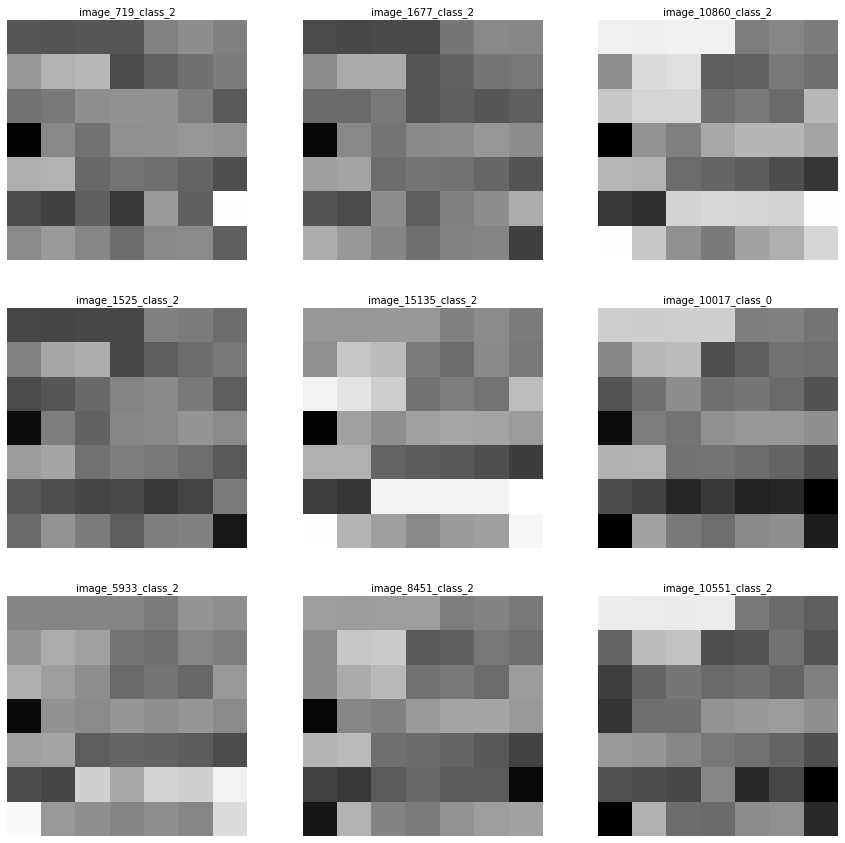

In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 15))
columns = rows = 3
for i in range(1, columns*rows +1):
    index = np.random.randint(len(x_train))
    img = x_train[index]
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title('image_'+str(index)+'_class_'+str(np.argmax(y_train[index])), fontsize=10)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.imshow(img)
plt.show()

In [40]:
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, MaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.initializers import RandomUniform, RandomNormal
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers
from functools import *
from sklearn.metrics import f1_score
from tensorflow.keras.metrics import AUC

In [41]:
model = Sequential()

In [42]:
model.add(Conv2D(64, (2,2), input_shape=(x_train[0].shape[0],x_train[0].shape[1], x_train[0].shape[2])))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
        
model.add(Flatten())
model.add(Dense(64))
          
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss="binary_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 64)          832       
_________________________________________________________________
activation (Activation)      (None, 6, 6, 64)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          16448     
_________________________________________________________________
activation_1 (Activation)    (None, 2, 2, 64)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [44]:
model.compile(loss="binary_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

In [45]:
history = model.fit(x_train, y_train, batch_size=32, epochs = 100, validation_data=(x_cv, y_cv), sample_weight=sample_weights)

Epoch 1/100
489/489 [==============================] - 2s 5ms/step - loss: 0.5322 - accuracy: 0.2873 - val_loss: 0.6288 - val_accuracy: 0.3096
Epoch 2/100
489/489 [==============================] - 2s 5ms/step - loss: 0.4163 - accuracy: 0.4726 - val_loss: 0.7159 - val_accuracy: 0.4215
Epoch 3/100
489/489 [==============================] - 3s 6ms/step - loss: 0.3789 - accuracy: 0.5437 - val_loss: 0.6038 - val_accuracy: 0.5119
Epoch 4/100
489/489 [==============================] - 3s 6ms/step - loss: 0.3554 - accuracy: 0.5871 - val_loss: 0.5786 - val_accuracy: 0.5457
Epoch 5/100
489/489 [==============================] - 2s 5ms/step - loss: 0.3317 - accuracy: 0.6131 - val_loss: 0.4780 - val_accuracy: 0.6161
Epoch 6/100
489/489 [==============================] - 2s 5ms/step - loss: 0.3250 - accuracy: 0.6206 - val_loss: 0.5336 - val_accuracy: 0.6000
Epoch 7/100
489/489 [==============================] - 3s 6ms/step - loss: 0.3116 - accuracy: 0.6389 - val_loss: 0.4986 - val_accuracy: 0.6271

Epoch 58/100
489/489 [==============================] - 3s 5ms/step - loss: 0.1971 - accuracy: 0.7844 - val_loss: 0.3449 - val_accuracy: 0.7688
Epoch 59/100
489/489 [==============================] - 3s 5ms/step - loss: 0.2036 - accuracy: 0.7822 - val_loss: 0.3728 - val_accuracy: 0.7421
Epoch 60/100
489/489 [==============================] - 3s 6ms/step - loss: 0.1952 - accuracy: 0.7834 - val_loss: 0.3859 - val_accuracy: 0.7488
Epoch 61/100
489/489 [==============================] - 3s 6ms/step - loss: 0.1958 - accuracy: 0.7908 - val_loss: 0.4827 - val_accuracy: 0.6932
Epoch 62/100
489/489 [==============================] - 3s 6ms/step - loss: 0.1949 - accuracy: 0.7894 - val_loss: 0.3731 - val_accuracy: 0.7408
Epoch 63/100
489/489 [==============================] - 3s 6ms/step - loss: 0.1931 - accuracy: 0.7919 - val_loss: 0.4453 - val_accuracy: 0.7201
Epoch 64/100
489/489 [==============================] - 3s 6ms/step - loss: 0.1967 - accuracy: 0.7850 - val_loss: 0.3780 - val_accuracy:

In [52]:
x_cv

array([[[[0.64735706, 0.64735706, 0.64735706],
         [0.64657177, 0.64657177, 0.64657177],
         [0.64867388, 0.64867388, 0.64867388],
         ...,
         [0.48977632, 0.48977632, 0.48977632],
         [0.53332378, 0.53332378, 0.53332378],
         [0.49974373, 0.49974373, 0.49974373]],

        [[0.60380026, 0.60380026, 0.60380026],
         [0.60260649, 0.60260649, 0.60260649],
         [0.712965  , 0.712965  , 0.712965  ],
         ...,
         [0.39678541, 0.39678541, 0.39678541],
         [0.48120208, 0.48120208, 0.48120208],
         [0.46099463, 0.46099463, 0.46099463]],

        [[0.59665074, 0.59665074, 0.59665074],
         [0.58300143, 0.58300143, 0.58300143],
         [0.56911112, 0.56911112, 0.56911112],
         ...,
         [0.46296785, 0.46296785, 0.46296785],
         [0.45341756, 0.45341756, 0.45341756],
         [0.00724181, 0.00724181, 0.00724181]],

        ...,

        [[0.64891778, 0.64891778, 0.64891778],
         [0.63811538, 0.63811538, 0.63811538]

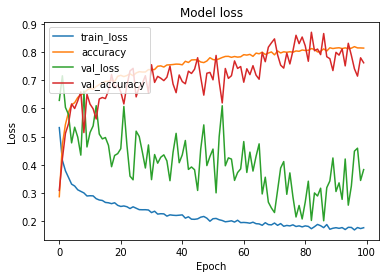

In [53]:
from matplotlib import pyplot as plt
%matplotlib inline
InteractiveShell.ast_node_interactivity = "last"

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'accuracy', 'val_loss', 'val_accuracy'], loc='upper left')
plt.show()

In [54]:
from sklearn.metrics import confusion_matrix, roc_auc_score, cohen_kappa_score
import seaborn as sns

test_res = model.evaluate(x_test, y_test, verbose=0)
print("keras evaluate=", test_res)
pred = model.predict(x_test)

keras evaluate= [0.356703519821167, 0.772224485874176]


In [65]:
pred

array([[1.1031672e-05, 5.9621024e-01, 4.0377870e-01],
       [2.7422802e-06, 2.1670346e-01, 7.8329378e-01],
       [1.1432445e-05, 2.1666203e-01, 7.8332657e-01],
       ...,
       [2.4901226e-06, 3.9487318e-03, 9.9604875e-01],
       [1.4077011e-03, 2.6613066e-05, 9.9856573e-01],
       [6.3938165e-01, 1.1656668e-07, 3.6061814e-01]], dtype=float32)

In [56]:
def check_baseline(pred, y_test):
    print("size of test set", len(y_test))
    e = np.equal(pred, y_test)
    print("TP class counts", np.unique(y_test[e], return_counts=True))
    print("True class counts", np.unique(y_test, return_counts=True))
    print("Pred class counts", np.unique(pred, return_counts=True))
    holds = np.unique(y_test, return_counts=True)[1][2]  # number 'hold' predictions
    print("baseline acc:", (holds/len(y_test)*100))

In [57]:
pred_classes = np.argmax(pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
check_baseline(pred_classes, y_test_classes)
conf_mat = confusion_matrix(y_test_classes, pred_classes)
print(conf_mat)
labels = [0,1,2]

size of test set 2441
TP class counts (array([0, 1, 2], dtype=int64), array([ 147,  129, 1609], dtype=int64))
True class counts (array([0, 1, 2], dtype=int64), array([ 152,  150, 2139], dtype=int64))
Pred class counts (array([0, 1, 2], dtype=int64), array([ 447,  359, 1635], dtype=int64))
baseline acc: 87.62802130274477
[[ 147    0    5]
 [   0  129   21]
 [ 300  230 1609]]


In [58]:
from sklearn.metrics import f1_score

f1_weighted = f1_score(y_test_classes, pred_classes, labels=None, average='weighted', sample_weight=None)
print("F1 score (weighted)", f1_weighted)
print("F1 score (macro)", f1_score(y_test_classes, pred_classes, labels=None, average='macro', sample_weight=None))
print("F1 score (micro)", f1_score(y_test_classes, pred_classes, labels=None, average='micro', sample_weight=None))

F1 score (weighted) 0.808893969097857
F1 score (macro) 0.6167901545217682
F1 score (micro) 0.7722244981564932


In [59]:
print("Currency_pair_score", cohen_kappa_score(y_test_classes, pred_classes))

Currency_pair_score 0.41985840947037345


In [60]:
prec = []
for i, row in enumerate(conf_mat):
    prec.append(np.round(row[i]/np.sum(row), 2))
    print("precision of class {} = {}".format(i, prec[i]))
print("precision avg", sum(prec)/len(prec))

precision of class 0 = 0.97
precision of class 1 = 0.86
precision of class 2 = 0.75
precision avg 0.86


In [61]:
x_train[0][0]

array([[0.29835819, 0.29835819, 0.29835819],
       [0.28905373, 0.28905373, 0.28905373],
       [0.29794378, 0.29794378, 0.29794378],
       [0.30056052, 0.30056052, 0.30056052],
       [0.50531641, 0.50531641, 0.50531641],
       [0.47350654, 0.47350654, 0.47350654],
       [0.41185809, 0.41185809, 0.41185809]])

In [62]:
len(y_test_classes)

2441

In [63]:
y_test



array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

# BACKTESTING HERE

In [73]:
df_backtest = pd.read_csv("AUD_USD_4H_backtest_for_CNN.csv")
open_prices = df_backtest['open']
close_prices = df_backtest['close']
high_prices = df_backtest['high']
low_prices = df_backtest['low']

In [74]:
supported = ["ROCP", "OROCP", "HROCP", "LROCP", "MACD", "RSI", "UO", "BOLL", "MA", "STOCH", "AO", "ROC", "WILLR"]

In [75]:
def extract_by_type(feature_type, open_prices=None, close_prices=None, high_prices=None, low_prices=None):
    if feature_type == 'ROCP':
        rocp1 = talib.ROCP(close_prices, timeperiod=1)
        rocp2 = talib.ROCP(close_prices, timeperiod=2)
        feature.append(rocp1)
        feature.append(rocp2)
    if feature_type == 'OROCP':
        orocp = talib.ROCP(open_prices, timeperiod=1)
        feature.append(orocp)
    if feature_type == 'HROCP':
        hrocp = talib.ROCP(high_prices, timeperiod=1)
        feature.append(hrocp)
    if feature_type == 'LROCP':
        lrocp = talib.ROCP(low_prices, timeperiod=1)
        feature.append(lrocp)
    if feature_type == 'MACD':
        macd, signal, hist = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
        norm_macd = numpy.nan_to_num(macd) / math.sqrt(numpy.var(numpy.nan_to_num(macd)))
        norm_signal = numpy.nan_to_num(signal) / math.sqrt(numpy.var(numpy.nan_to_num(signal)))
        norm_hist = numpy.nan_to_num(hist) / math.sqrt(numpy.var(numpy.nan_to_num(hist)))
        macdrocp = talib.ROCP(norm_macd + numpy.max(norm_macd) - numpy.min(norm_macd), timeperiod=1)
        signalrocp = talib.ROCP(norm_signal + numpy.max(norm_signal) - numpy.min(norm_signal), timeperiod=1)
        histrocp = talib.ROCP(norm_hist + numpy.max(norm_hist) - numpy.min(norm_hist), timeperiod=1)
        # feature.append(macd / 100.0)
        # feature.append(signal / 100.0)
        # feature.append(hist / 100.0)
        feature.append(norm_macd)
        feature.append(norm_signal)
        feature.append(norm_hist)

        feature.append(macdrocp)
        feature.append(signalrocp)
        feature.append(histrocp)
    if feature_type == 'RSI':
        rsi6 = talib.RSI(close_prices, timeperiod=6)
        rsi12 = talib.RSI(close_prices, timeperiod=12)
        rsi24 = talib.RSI(close_prices, timeperiod=24)
        rsi6rocp = talib.ROCP(rsi6 + 100., timeperiod=1)
        rsi12rocp = talib.ROCP(rsi12 + 100., timeperiod=1)
        rsi24rocp = talib.ROCP(rsi24 + 100., timeperiod=1)
        feature.append(rsi6 / 100.0 - 0.5)
        feature.append(rsi12 / 100.0 - 0.5)
        feature.append(rsi24 / 100.0 - 0.5)
        # feature.append(numpy.maximum(rsi6 / 100.0 - 0.8, 0))
        # feature.append(numpy.maximum(rsi12 / 100.0 - 0.8, 0))
        # feature.append(numpy.maximum(rsi24 / 100.0 - 0.8, 0))
        # feature.append(numpy.minimum(rsi6 / 100.0 - 0.2, 0))
        # feature.append(numpy.minimum(rsi6 / 100.0 - 0.2, 0))
        # feature.append(numpy.minimum(rsi6 / 100.0 - 0.2, 0))
        # feature.append(numpy.maximum(numpy.minimum(rsi6 / 100.0 - 0.5, 0.3), -0.3))
        # feature.append(numpy.maximum(numpy.minimum(rsi6 / 100.0 - 0.5, 0.3), -0.3))
        # feature.append(numpy.maximum(numpy.minimum(rsi6 / 100.0 - 0.5, 0.3), -0.3))
        feature.append(rsi6rocp)
        feature.append(rsi12rocp)
        feature.append(rsi24rocp)
    if feature_type == 'UO':
        ult_osc = talib.ULTOSC(high_prices, low_prices, close_prices, timeperiod1=7, timeperiod2=14, timeperiod3=28)
        feature.append(ult_osc / 100.0 - 0.5)
    if feature_type == 'BOLL':
        upperband, middleband, lowerband = talib.BBANDS(close_prices, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
        feature.append((upperband - close_prices) / close_prices)
        feature.append((middleband - close_prices) / close_prices)
        feature.append((lowerband - close_prices) / close_prices)         
    if feature_type == 'MA':
        ma5 = talib.MA(close_prices, timeperiod=5)
        ma10 = talib.MA(close_prices, timeperiod=10)
        ma20 = talib.MA(close_prices, timeperiod=20)
        ma25 = talib.MA(close_prices, timeperiod=25)
        ma30 = talib.MA(close_prices, timeperiod=30)
        ma40 = talib.MA(close_prices, timeperiod=40)
        ma50 = talib.MA(close_prices, timeperiod=50)
        ma60 = talib.MA(close_prices, timeperiod=60)
        #ma360 = talib.MA(close_prices, timeperiod=70)
        #ma720 = talib.MA(close_prices, timeperiod=720)
        ma5rocp = talib.ROCP(ma5, timeperiod=1)
        ma10rocp = talib.ROCP(ma10, timeperiod=1)
        ma20rocp = talib.ROCP(ma20, timeperiod=1)
        ma25rocp = talib.ROCP(ma25, timeperiod=1)
        ma30rocp = talib.ROCP(ma30, timeperiod=1)
        ma40rocp = talib.ROCP(ma40, timeperiod=1)
        ma50rocp = talib.ROCP(ma50, timeperiod=1)
        ma60rocp = talib.ROCP(ma60, timeperiod=1)
        #ma360rocp = talib.ROCP(ma360, timeperiod=1)
        #ma720rocp = talib.ROCP(ma720, timeperiod=1)
        feature.append(ma5rocp)
        feature.append(ma10rocp)
        feature.append(ma20rocp)
        feature.append(ma25rocp)
        feature.append(ma30rocp)
        feature.append(ma40rocp)
        feature.append(ma50rocp)
        feature.append(ma60rocp)
        #feature.append(ma360rocp)
        #feature.append(ma720rocp)
        feature.append((ma5 - close_prices) / close_prices)
        feature.append((ma10 - close_prices) / close_prices)
        feature.append((ma20 - close_prices) / close_prices)
        feature.append((ma25 - close_prices) / close_prices)
        feature.append((ma30 - close_prices) / close_prices)
        feature.append((ma40 - close_prices) / close_prices)
        feature.append((ma50 - close_prices) / close_prices)
        feature.append((ma60 - close_prices) / close_prices)
        #feature.append((ma360 - close_prices) / close_prices)
        #feature.append((ma720 - close_prices) / close_prices)
    if feature_type == 'STOCH':
        slow_stoch_k, slow_stoch_d = talib.STOCH(high_prices ,low_prices ,close_prices ,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
        fast_stoch_k, fast_stoch_d = talib.STOCHF(high_prices , low_prices , close_prices , fastk_period=5, fastd_period=3, fastd_matype=0)
        fast_rsi_k, fast_rsi_d = talib.STOCHRSI(close_prices, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)                      
        feature.append(slow_stoch_k / 100.0 - 0.5)
        feature.append(slow_stoch_d / 100.0 - 0.5)
        feature.append(fast_stoch_k / 100.0 - 0.5)
        feature.append(fast_stoch_d / 100.0 - 0.5)
        feature.append(fast_rsi_k / 100.0 - 0.5)
        feature.append(fast_rsi_d / 100.0 - 0.5)
    if feature_type == 'AO':          
        median_price = (high_prices + low_prices) / 2
        ao = talib.SMA(median_price, 5)-talib.SMA(median_price, 34)          
        feature.append(ao)
    if feature_type == 'ROC':
        roc5 = talib.ROC(close_prices, timeperiod=5)
        roc10 = talib.ROC(close_prices, timeperiod=10)
        roc20 = talib.ROC(close_prices, timeperiod=20)
        roc25 = talib.ROC(close_prices, timeperiod=25)
        feature.append(roc5)
        feature.append(roc10)
        feature.append(roc20)
        feature.append(roc25)
    if feature_type == 'WILLR':
        willr = talib.WILLR(high_prices,low_prices,close_prices, timeperiod=14)
        feature.append(willr / 100.0 - 0.5)

    return feature

In [76]:
list_is = ["ROCP1", "ROCP2", "OROCP", "HROCP", "LROCP", "norm_macd", "norm_signal", "norm_hist", "macdrocp", "singalrocp", "histrocp",
            "rsi6", "rsi12", "rsi24", "rsi6rocp", "rsi12rocp", "rsi24rocp", "UO", "upperBOLL", "middleBOLL",
            "lowerBOLL", "MA5", "MA10", "MA20", "MA30", "MA60", "MA90", "MA120", "MA180",
            "MA5rocp", "MA10rocp", "MA20rocp", "MA30rocp", "MA60rocp", "MA90rocp", "MA120rocp", "MA180rocp", "Slow_stochk", 
            "Slow_stochd", "Fast_stochk", "Fast_stochd", "Fast_stoch_rsik", "Fast_stoch_rsid", "AO","ROC5", "ROC10", "ROC20",
            "ROC25", "WILLR"]
len(list_is)

49

In [77]:
feature = []
for i in supported:
    extract_by_type(i, open_prices=open_prices, close_prices=close_prices, high_prices=high_prices, low_prices=low_prices)

[0           NaN
 1     -0.001283
 2      0.001427
 3     -0.000143
 4     -0.001995
          ...   
 579    0.000000
 580   -0.007705
 581    0.004193
 582    0.003248
 583    0.005704
 Length: 584, dtype: float64,
 0           NaN
 1           NaN
 2      0.000143
 3      0.001284
 4     -0.002138
          ...   
 579    0.002472
 580   -0.007705
 581   -0.003544
 582    0.007455
 583    0.008970
 Length: 584, dtype: float64]

[0           NaN
 1     -0.001283
 2      0.001427
 3     -0.000143
 4     -0.001995
          ...   
 579    0.000000
 580   -0.007705
 581    0.004193
 582    0.003248
 583    0.005704
 Length: 584, dtype: float64,
 0           NaN
 1           NaN
 2      0.000143
 3      0.001284
 4     -0.002138
          ...   
 579    0.002472
 580   -0.007705
 581   -0.003544
 582    0.007455
 583    0.008970
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.001566
 3      0.000570
 4     -0.000143
          ...   
 579    0.002472
 580    0.000000
 581   -0.007705
 582    0.004193
 583    0.003248
 Length: 584, dtype: float64]

[0           NaN
 1     -0.001283
 2      0.001427
 3     -0.000143
 4     -0.001995
          ...   
 579    0.000000
 580   -0.007705
 581    0.004193
 582    0.003248
 583    0.005704
 Length: 584, dtype: float64,
 0           NaN
 1           NaN
 2      0.000143
 3      0.001284
 4     -0.002138
          ...   
 579    0.002472
 580   -0.007705
 581   -0.003544
 582    0.007455
 583    0.008970
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.001566
 3      0.000570
 4     -0.000143
          ...   
 579    0.002472
 580    0.000000
 581   -0.007705
 582    0.004193
 583    0.003248
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.000712
 3      0.000142
 4     -0.000142
          ...   
 579    0.000770
 580   -0.000769
 581   -0.003696
 582    0.004019
 583    0.004465
 Length: 584, dtype: float64]

[0           NaN
 1     -0.001283
 2      0.001427
 3     -0.000143
 4     -0.001995
          ...   
 579    0.000000
 580   -0.007705
 581    0.004193
 582    0.003248
 583    0.005704
 Length: 584, dtype: float64,
 0           NaN
 1           NaN
 2      0.000143
 3      0.001284
 4     -0.002138
          ...   
 579    0.002472
 580   -0.007705
 581   -0.003544
 582    0.007455
 583    0.008970
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.001566
 3      0.000570
 4     -0.000143
          ...   
 579    0.002472
 580    0.000000
 581   -0.007705
 582    0.004193
 583    0.003248
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.000712
 3      0.000142
 4     -0.000142
          ...   
 579    0.000770
 580   -0.000769
 581   -0.003696
 582    0.004019
 583    0.004465
 Length: 584, dtype: float64,
 0           NaN
 1     -0.001425
 2      0.000714
 3     -0.000713
 4     -0.001570
          ...   
 579    0.003097
 580   -0.006

[0           NaN
 1     -0.001283
 2      0.001427
 3     -0.000143
 4     -0.001995
          ...   
 579    0.000000
 580   -0.007705
 581    0.004193
 582    0.003248
 583    0.005704
 Length: 584, dtype: float64,
 0           NaN
 1           NaN
 2      0.000143
 3      0.001284
 4     -0.002138
          ...   
 579    0.002472
 580   -0.007705
 581   -0.003544
 582    0.007455
 583    0.008970
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.001566
 3      0.000570
 4     -0.000143
          ...   
 579    0.002472
 580    0.000000
 581   -0.007705
 582    0.004193
 583    0.003248
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.000712
 3      0.000142
 4     -0.000142
          ...   
 579    0.000770
 580   -0.000769
 581   -0.003696
 582    0.004019
 583    0.004465
 Length: 584, dtype: float64,
 0           NaN
 1     -0.001425
 2      0.000714
 3     -0.000713
 4     -0.001570
          ...   
 579    0.003097
 580   -0.006

[0           NaN
 1     -0.001283
 2      0.001427
 3     -0.000143
 4     -0.001995
          ...   
 579    0.000000
 580   -0.007705
 581    0.004193
 582    0.003248
 583    0.005704
 Length: 584, dtype: float64,
 0           NaN
 1           NaN
 2      0.000143
 3      0.001284
 4     -0.002138
          ...   
 579    0.002472
 580   -0.007705
 581   -0.003544
 582    0.007455
 583    0.008970
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.001566
 3      0.000570
 4     -0.000143
          ...   
 579    0.002472
 580    0.000000
 581   -0.007705
 582    0.004193
 583    0.003248
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.000712
 3      0.000142
 4     -0.000142
          ...   
 579    0.000770
 580   -0.000769
 581   -0.003696
 582    0.004019
 583    0.004465
 Length: 584, dtype: float64,
 0           NaN
 1     -0.001425
 2      0.000714
 3     -0.000713
 4     -0.001570
          ...   
 579    0.003097
 580   -0.006

[0           NaN
 1     -0.001283
 2      0.001427
 3     -0.000143
 4     -0.001995
          ...   
 579    0.000000
 580   -0.007705
 581    0.004193
 582    0.003248
 583    0.005704
 Length: 584, dtype: float64,
 0           NaN
 1           NaN
 2      0.000143
 3      0.001284
 4     -0.002138
          ...   
 579    0.002472
 580   -0.007705
 581   -0.003544
 582    0.007455
 583    0.008970
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.001566
 3      0.000570
 4     -0.000143
          ...   
 579    0.002472
 580    0.000000
 581   -0.007705
 582    0.004193
 583    0.003248
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.000712
 3      0.000142
 4     -0.000142
          ...   
 579    0.000770
 580   -0.000769
 581   -0.003696
 582    0.004019
 583    0.004465
 Length: 584, dtype: float64,
 0           NaN
 1     -0.001425
 2      0.000714
 3     -0.000713
 4     -0.001570
          ...   
 579    0.003097
 580   -0.006

[0           NaN
 1     -0.001283
 2      0.001427
 3     -0.000143
 4     -0.001995
          ...   
 579    0.000000
 580   -0.007705
 581    0.004193
 582    0.003248
 583    0.005704
 Length: 584, dtype: float64,
 0           NaN
 1           NaN
 2      0.000143
 3      0.001284
 4     -0.002138
          ...   
 579    0.002472
 580   -0.007705
 581   -0.003544
 582    0.007455
 583    0.008970
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.001566
 3      0.000570
 4     -0.000143
          ...   
 579    0.002472
 580    0.000000
 581   -0.007705
 582    0.004193
 583    0.003248
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.000712
 3      0.000142
 4     -0.000142
          ...   
 579    0.000770
 580   -0.000769
 581   -0.003696
 582    0.004019
 583    0.004465
 Length: 584, dtype: float64,
 0           NaN
 1     -0.001425
 2      0.000714
 3     -0.000713
 4     -0.001570
          ...   
 579    0.003097
 580   -0.006

[0           NaN
 1     -0.001283
 2      0.001427
 3     -0.000143
 4     -0.001995
          ...   
 579    0.000000
 580   -0.007705
 581    0.004193
 582    0.003248
 583    0.005704
 Length: 584, dtype: float64,
 0           NaN
 1           NaN
 2      0.000143
 3      0.001284
 4     -0.002138
          ...   
 579    0.002472
 580   -0.007705
 581   -0.003544
 582    0.007455
 583    0.008970
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.001566
 3      0.000570
 4     -0.000143
          ...   
 579    0.002472
 580    0.000000
 581   -0.007705
 582    0.004193
 583    0.003248
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.000712
 3      0.000142
 4     -0.000142
          ...   
 579    0.000770
 580   -0.000769
 581   -0.003696
 582    0.004019
 583    0.004465
 Length: 584, dtype: float64,
 0           NaN
 1     -0.001425
 2      0.000714
 3     -0.000713
 4     -0.001570
          ...   
 579    0.003097
 580   -0.006

[0           NaN
 1     -0.001283
 2      0.001427
 3     -0.000143
 4     -0.001995
          ...   
 579    0.000000
 580   -0.007705
 581    0.004193
 582    0.003248
 583    0.005704
 Length: 584, dtype: float64,
 0           NaN
 1           NaN
 2      0.000143
 3      0.001284
 4     -0.002138
          ...   
 579    0.002472
 580   -0.007705
 581   -0.003544
 582    0.007455
 583    0.008970
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.001566
 3      0.000570
 4     -0.000143
          ...   
 579    0.002472
 580    0.000000
 581   -0.007705
 582    0.004193
 583    0.003248
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.000712
 3      0.000142
 4     -0.000142
          ...   
 579    0.000770
 580   -0.000769
 581   -0.003696
 582    0.004019
 583    0.004465
 Length: 584, dtype: float64,
 0           NaN
 1     -0.001425
 2      0.000714
 3     -0.000713
 4     -0.001570
          ...   
 579    0.003097
 580   -0.006

[0           NaN
 1     -0.001283
 2      0.001427
 3     -0.000143
 4     -0.001995
          ...   
 579    0.000000
 580   -0.007705
 581    0.004193
 582    0.003248
 583    0.005704
 Length: 584, dtype: float64,
 0           NaN
 1           NaN
 2      0.000143
 3      0.001284
 4     -0.002138
          ...   
 579    0.002472
 580   -0.007705
 581   -0.003544
 582    0.007455
 583    0.008970
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.001566
 3      0.000570
 4     -0.000143
          ...   
 579    0.002472
 580    0.000000
 581   -0.007705
 582    0.004193
 583    0.003248
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.000712
 3      0.000142
 4     -0.000142
          ...   
 579    0.000770
 580   -0.000769
 581   -0.003696
 582    0.004019
 583    0.004465
 Length: 584, dtype: float64,
 0           NaN
 1     -0.001425
 2      0.000714
 3     -0.000713
 4     -0.001570
          ...   
 579    0.003097
 580   -0.006

[0           NaN
 1     -0.001283
 2      0.001427
 3     -0.000143
 4     -0.001995
          ...   
 579    0.000000
 580   -0.007705
 581    0.004193
 582    0.003248
 583    0.005704
 Length: 584, dtype: float64,
 0           NaN
 1           NaN
 2      0.000143
 3      0.001284
 4     -0.002138
          ...   
 579    0.002472
 580   -0.007705
 581   -0.003544
 582    0.007455
 583    0.008970
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.001566
 3      0.000570
 4     -0.000143
          ...   
 579    0.002472
 580    0.000000
 581   -0.007705
 582    0.004193
 583    0.003248
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.000712
 3      0.000142
 4     -0.000142
          ...   
 579    0.000770
 580   -0.000769
 581   -0.003696
 582    0.004019
 583    0.004465
 Length: 584, dtype: float64,
 0           NaN
 1     -0.001425
 2      0.000714
 3     -0.000713
 4     -0.001570
          ...   
 579    0.003097
 580   -0.006

[0           NaN
 1     -0.001283
 2      0.001427
 3     -0.000143
 4     -0.001995
          ...   
 579    0.000000
 580   -0.007705
 581    0.004193
 582    0.003248
 583    0.005704
 Length: 584, dtype: float64,
 0           NaN
 1           NaN
 2      0.000143
 3      0.001284
 4     -0.002138
          ...   
 579    0.002472
 580   -0.007705
 581   -0.003544
 582    0.007455
 583    0.008970
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.001566
 3      0.000570
 4     -0.000143
          ...   
 579    0.002472
 580    0.000000
 581   -0.007705
 582    0.004193
 583    0.003248
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.000712
 3      0.000142
 4     -0.000142
          ...   
 579    0.000770
 580   -0.000769
 581   -0.003696
 582    0.004019
 583    0.004465
 Length: 584, dtype: float64,
 0           NaN
 1     -0.001425
 2      0.000714
 3     -0.000713
 4     -0.001570
          ...   
 579    0.003097
 580   -0.006

In [78]:
feature

[0           NaN
 1     -0.001283
 2      0.001427
 3     -0.000143
 4     -0.001995
          ...   
 579    0.000000
 580   -0.007705
 581    0.004193
 582    0.003248
 583    0.005704
 Length: 584, dtype: float64,
 0           NaN
 1           NaN
 2      0.000143
 3      0.001284
 4     -0.002138
          ...   
 579    0.002472
 580   -0.007705
 581   -0.003544
 582    0.007455
 583    0.008970
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.001566
 3      0.000570
 4     -0.000143
          ...   
 579    0.002472
 580    0.000000
 581   -0.007705
 582    0.004193
 583    0.003248
 Length: 584, dtype: float64,
 0           NaN
 1      0.000427
 2     -0.000712
 3      0.000142
 4     -0.000142
          ...   
 579    0.000770
 580   -0.000769
 581   -0.003696
 582    0.004019
 583    0.004465
 Length: 584, dtype: float64,
 0           NaN
 1     -0.001425
 2      0.000714
 3     -0.000713
 4     -0.001570
          ...   
 579    0.003097
 580   -0.006

In [79]:
df = pd.DataFrame(feature)

In [80]:
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.001283,NaN,0.000427,0.000427,-0.001425,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.001427,0.000143,-0.001566,-0.000712,0.000714,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.000143,0.001284,0.000570,0.000142,-0.000713,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.001995,-0.002138,-0.000143,-0.000142,-0.001570,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0.000000,0.002472,0.002472,0.000770,0.003097,0.403058,0.554191,-0.505913,-0.010822,-0.005316,...,-0.192308,-0.263944,-0.338853,-0.392569,0.003841,-0.703902,-0.444922,1.106264,0.901882,-1.192308
580,-0.007705,-0.007705,0.000000,-0.000769,-0.006948,0.229197,0.491102,-0.950356,-0.026177,-0.010039,...,-0.443089,-0.275902,-0.500000,-0.392569,0.002024,-1.739661,-1.166539,0.609375,0.264715,-1.445736
581,0.004193,-0.003544,-0.007705,-0.003696,0.000155,0.151032,0.424347,-1.005588,-0.012085,-0.010730,...,-0.085366,-0.240254,0.118533,-0.240107,0.000351,-0.721634,-1.070991,1.047039,0.466128,-1.236434
582,0.003248,0.007455,0.004193,0.004019,0.004353,0.135252,0.367655,-0.853990,-0.002469,-0.009211,...,0.333333,-0.065041,0.500000,0.039511,-0.000032,0.216283,-0.688916,1.090852,0.964981,-1.073643


In [81]:
df.columns = ["ROCP1", "ROCP2", "OROCP", "HROCP", "LROCP", "norm_macd", "norm_signal", "norm_hist", "macdrocp", "singalrocp", "histrocp",
            "rsi6", "rsi12", "rsi24", "rsi6rocp", "rsi12rocp", "rsi24rocp", "UO", "upperBOLL", "middleBOLL",
            "lowerBOLL", "MA5", "MA10", "MA20", "MA30", "MA60", "MA90", "MA120", "MA180",
            "MA5rocp", "MA10rocp", "MA20rocp", "MA30rocp", "MA60rocp", "MA90rocp", "MA120rocp", "MA180rocp", "Slow_stochk", 
            "Slow_stochd", "Fast_stochk", "Fast_stochd", "Fast_stoch_rsik", "Fast_stoch_rsid", "AO","ROC5", "ROC10", "ROC20",
            "ROC25", "WILLR"]
df.insert(0,"close",close_prices)
df.insert(0,"low",low_prices)
df.insert(0,"high",high_prices)
df.insert(0,"open",open_prices)

In [82]:
import pandas as pd
import pickle 
import numpy as np
from tqdm import tqdm_notebook as tqdm
from IPython.core.interactiveshell import InteractiveShell

df = df.dropna()
df = df.reset_index()
df.drop(['index'],axis=1)
df = df.drop(['index'],axis=1)
df

,open,high,low,close,ROCP1,ROCP2,OROCP,HROCP,LROCP,norm_macd,...,Fast_stochk,Fast_stochd,Fast_stoch_rsik,Fast_stoch_rsid,AO,ROC5,ROC10,ROC20,ROC25,WILLR
0,0.6899,0.6902,0.6893,0.6898,-0.000145,-0.000580,-0.000435,-0.000434,0.000290,0.008659,...,-0.111111,-0.017898,-0.500000,-0.265721,0.001538,-0.043472,-0.130303,0.627279,0.334545,-1.128571
1,0.6898,0.6901,0.6882,0.6887,-0.001595,-0.001739,-0.000145,-0.000145,-0.001596,-0.020166,...,-0.314815,-0.168291,-0.500000,-0.500000,0.001294,-0.217328,-0.361690,0.116296,0.422864,-1.368421
2,0.6887,0.6898,0.6877,0.6885,-0.000290,-0.001885,-0.001595,-0.000435,-0.000727,-0.047012,...,-0.224138,-0.216688,-0.500000,-0.500000,0.000908,-0.275203,-0.275203,0.130890,0.291333,-1.309524
3,0.6885,0.6917,0.6885,0.6910,0.003631,0.003340,-0.000290,0.002754,0.001163,-0.011341,...,0.325000,-0.071318,0.500000,-0.166667,0.000810,0.115908,0.290276,0.450647,0.846468,-0.675000
4,0.6910,0.6911,0.6899,0.6902,-0.001158,0.002469,0.003631,-0.000867,0.002033,-0.001238,...,0.125000,0.075287,0.191669,0.063890,0.000868,0.043485,0.087007,-0.057921,0.641586,-0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,0.6489,0.6498,0.6477,0.6489,0.000000,0.002472,0.002472,0.000770,0.003097,0.403058,...,-0.192308,-0.263944,-0.338853,-0.392569,0.003841,-0.703902,-0.444922,1.106264,0.901882,-1.192308
520,0.6489,0.6493,0.6432,0.6439,-0.007705,-0.007705,0.000000,-0.000769,-0.006948,0.229197,...,-0.443089,-0.275902,-0.500000,-0.392569,0.002024,-1.739661,-1.166539,0.609375,0.264715,-1.445736
521,0.6439,0.6469,0.6433,0.6466,0.004193,-0.003544,-0.007705,-0.003696,0.000155,0.151032,...,-0.085366,-0.240254,0.118533,-0.240107,0.000351,-0.721634,-1.070991,1.047039,0.466128,-1.236434
522,0.6466,0.6495,0.6461,0.6487,0.003248,0.007455,0.004193,0.004019,0.004353,0.135252,...,0.333333,-0.065041,0.500000,0.039511,-0.000032,0.216283,-0.688916,1.090852,0.964981,-1.073643


In [83]:
def create_labels(df, col_name, window_size=11):
    """
    Data is labeled as per the logic in research paper
    Label code : BUY => 1, SELL => 0, HOLD => 2
    params :
        df => Dataframe with data
        col_name => name of column which should be used to determine strategy
    returns : numpy array with integer codes for labels with
              size = total-(window_size)+1
    """

    row_counter = 0
    total_rows = len(df)
    labels = np.zeros(total_rows)
    labels[:] = np.nan
    print("Calculating labels")
    pbar = tqdm(total=total_rows)

    while row_counter < total_rows:
        if row_counter >= window_size - 1:
            window_begin = row_counter - (window_size - 1)
            window_end = row_counter
            window_middle = (window_begin + window_end) / 2

            min_ = np.inf
            min_index = -1
            max_ = -np.inf
            max_index = -1
            for i in range(window_begin, window_end + 1):
                price = df.iloc[i][col_name]
                if price < min_:
                    min_ = price
                    min_index = i
                if price > max_:
                    max_ = price
                    max_index = i

            if max_index == window_middle:
                labels[row_counter] = 0
            elif min_index == window_middle:
                labels[row_counter] = 1
            else:
                labels[row_counter] = 2

        row_counter = row_counter + 1
        pbar.update(1)

    pbar.close()
    return labels

df['labels'] = create_labels(df, 'close')
df

Calculating labels


C:\Users\kohli\anaconda3\lib\site-packages\ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


,open,high,low,close,ROCP1,ROCP2,OROCP,HROCP,LROCP,norm_macd,...,Fast_stochd,Fast_stoch_rsik,Fast_stoch_rsid,AO,ROC5,ROC10,ROC20,ROC25,WILLR,labels
0,0.6899,0.6902,0.6893,0.6898,-0.000145,-0.000580,-0.000435,-0.000434,0.000290,0.008659,...,-0.017898,-0.500000,-0.265721,0.001538,-0.043472,-0.130303,0.627279,0.334545,-1.128571,NaN
1,0.6898,0.6901,0.6882,0.6887,-0.001595,-0.001739,-0.000145,-0.000145,-0.001596,-0.020166,...,-0.168291,-0.500000,-0.500000,0.001294,-0.217328,-0.361690,0.116296,0.422864,-1.368421,NaN
2,0.6887,0.6898,0.6877,0.6885,-0.000290,-0.001885,-0.001595,-0.000435,-0.000727,-0.047012,...,-0.216688,-0.500000,-0.500000,0.000908,-0.275203,-0.275203,0.130890,0.291333,-1.309524,NaN
3,0.6885,0.6917,0.6885,0.6910,0.003631,0.003340,-0.000290,0.002754,0.001163,-0.011341,...,-0.071318,0.500000,-0.166667,0.000810,0.115908,0.290276,0.450647,0.846468,-0.675000,NaN
4,0.6910,0.6911,0.6899,0.6902,-0.001158,0.002469,0.003631,-0.000867,0.002033,-0.001238,...,0.075287,0.191669,0.063890,0.000868,0.043485,0.087007,-0.057921,0.641586,-0.875000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,0.6489,0.6498,0.6477,0.6489,0.000000,0.002472,0.002472,0.000770,0.003097,0.403058,...,-0.263944,-0.338853,-0.392569,0.003841,-0.703902,-0.444922,1.106264,0.901882,-1.192308,2.0
520,0.6489,0.6493,0.6432,0.6439,-0.007705,-0.007705,0.000000,-0.000769,-0.006948,0.229197,...,-0.275902,-0.500000,-0.392569,0.002024,-1.739661,-1.166539,0.609375,0.264715,-1.445736,0.0
521,0.6439,0.6469,0.6433,0.6466,0.004193,-0.003544,-0.007705,-0.003696,0.000155,0.151032,...,-0.240254,0.118533,-0.240107,0.000351,-0.721634,-1.070991,1.047039,0.466128,-1.236434,2.0
522,0.6466,0.6495,0.6461,0.6487,0.003248,0.007455,0.004193,0.004019,0.004353,0.135252,...,-0.065041,0.500000,0.039511,-0.000032,0.216283,-0.688916,1.090852,0.964981,-1.073643,2.0


In [84]:
df = df.dropna()
df = df.reset_index()
df.drop(['index'],axis=1)
df = df.drop(['index'],axis=1)
df

,open,high,low,close,ROCP1,ROCP2,OROCP,HROCP,LROCP,norm_macd,...,Fast_stochd,Fast_stoch_rsik,Fast_stoch_rsid,AO,ROC5,ROC10,ROC20,ROC25,WILLR,labels
0,0.6892,0.6901,0.6888,0.6898,0.000871,-0.003611,-0.004478,-0.003610,0.000000,0.050884,...,-0.169979,-0.321031,-0.107010,0.001397,-0.173661,0.000000,-0.130303,-0.043472,-1.131579,2.0
1,0.6898,0.6901,0.6884,0.6895,-0.000435,0.000435,0.000871,0.000000,-0.000581,0.027520,...,-0.325217,-0.404503,-0.408512,0.001016,-0.173737,0.116161,-0.245949,-0.043491,-1.184211,2.0
2,0.6895,0.6905,0.6891,0.6898,0.000435,0.000000,-0.000435,0.000580,0.001017,0.015641,...,-0.260870,-0.308532,-0.344689,0.000637,-0.317919,0.188816,-0.086906,-0.202546,-1.131579,2.0
3,0.6898,0.6911,0.6895,0.6908,0.001450,0.001885,0.000435,0.000869,0.000580,0.028624,...,-0.142857,0.500000,-0.071012,0.000046,-0.216669,-0.028944,0.261248,-0.130114,-0.956140,0.0
4,0.6908,0.6910,0.6887,0.6888,-0.002895,-0.001450,0.001450,-0.000145,-0.001160,-0.006467,...,-0.166808,-0.500000,-0.102844,-0.000235,-0.058038,-0.202840,-0.116009,-0.246198,-1.307018,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.6489,0.6498,0.6477,0.6489,0.000000,0.002472,0.002472,0.000770,0.003097,0.403058,...,-0.263944,-0.338853,-0.392569,0.003841,-0.703902,-0.444922,1.106264,0.901882,-1.192308,2.0
510,0.6489,0.6493,0.6432,0.6439,-0.007705,-0.007705,0.000000,-0.000769,-0.006948,0.229197,...,-0.275902,-0.500000,-0.392569,0.002024,-1.739661,-1.166539,0.609375,0.264715,-1.445736,0.0
511,0.6439,0.6469,0.6433,0.6466,0.004193,-0.003544,-0.007705,-0.003696,0.000155,0.151032,...,-0.240254,0.118533,-0.240107,0.000351,-0.721634,-1.070991,1.047039,0.466128,-1.236434,2.0
512,0.6466,0.6495,0.6461,0.6487,0.003248,0.007455,0.004193,0.004019,0.004353,0.135252,...,-0.065041,0.500000,0.039511,-0.000032,0.216283,-0.688916,1.090852,0.964981,-1.073643,2.0


In [85]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from collections import Counter

In [86]:
list_features = list(df.loc[:, 'open':'WILLR'].columns)
print('Total number of features', len(list_features))

Total number of features 53


In [186]:
x_test = df.loc[:, 'open':'WILLR'].values
y_test = df['labels'].values

In [187]:
x_test

array([[ 0.6892    ,  0.6901    ,  0.6888    , ..., -0.13030259,
        -0.04347196, -1.13157895],
       [ 0.6898    ,  0.6901    ,  0.6884    , ..., -0.24594907,
        -0.04349087, -1.18421053],
       [ 0.6895    ,  0.6905    ,  0.6891    , ..., -0.08690614,
        -0.2025463 , -1.13157895],
       ...,
       [ 0.6439    ,  0.6469    ,  0.6433    , ...,  1.0470386 ,
         0.46612803, -1.23643411],
       [ 0.6466    ,  0.6495    ,  0.6461    , ...,  1.09085242,
         0.96498054, -1.07364341],
       [ 0.6487    ,  0.6524    ,  0.6483    , ...,  1.05328377,
         1.21005275, -0.78682171]])

In [188]:
x_test = mm_scaler.transform(x_test)

In [126]:
x_test1

array([[0.17398451, 0.16214916, 0.17457038, ..., 0.54749577, 0.56498248,
        0.36842105],
       [0.1751728 , 0.16214916, 0.1737757 , ..., 0.54297868, 0.56498174,
        0.31578947],
       [0.17457865, 0.16295108, 0.17516639, ..., 0.54919081, 0.55879105,
        0.36842105],
       ...,
       [0.08426911, 0.0755413 , 0.08417602, ..., 0.59348207, 0.58481694,
        0.26356589],
       [0.08961638, 0.08075381, 0.08973875, ..., 0.59519342, 0.60423309,
        0.42635659],
       [0.09377537, 0.08656776, 0.09410947, ..., 0.59372601, 0.6137717 ,
        0.71317829]])

In [158]:
select_k_best = SelectKBest(f_classif, k=53)

In [185]:
y

array([[1. ],
       [1. ],
       [1. ],
       [0. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0.5],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0.5],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
      

In [166]:
y = mm_scaler.fit_transform(y)
y_test = y

array([[1. ],
       [1. ],
       [1. ],
       [0. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0.5],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0.5],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
      

In [127]:
common = list(set(selected_features_traderbot).intersection(selected_features_mic))

In [189]:
print("common selected features", len(common), common)
feat_idx = []
for c in common:
    feat_idx.append(list_features.index(c))
feat_idx = sorted(feat_idx[0:49])
print(feat_idx)

common selected features 53 ['MA30rocp', 'Slow_stochd', 'open', 'MA20rocp', 'ROCP2', 'norm_hist', 'MA180rocp', 'AO', 'singalrocp', 'ROC10', 'Fast_stochd', 'MA30', 'LROCP', 'rsi24', 'HROCP', 'lowerBOLL', 'ROC20', 'MA5rocp', 'rsi12rocp', 'high', 'MA20', 'Fast_stoch_rsid', 'OROCP', 'rsi12', 'low', 'MA180', 'ROC25', 'norm_signal', 'MA5', 'MA90rocp', 'close', 'Fast_stoch_rsik', 'MA60rocp', 'WILLR', 'MA90', 'middleBOLL', 'rsi24rocp', 'upperBOLL', 'MA10', 'Fast_stochk', 'rsi6rocp', 'UO', 'norm_macd', 'MA60', 'ROC5', 'macdrocp', 'MA120', 'Slow_stochk', 'histrocp', 'MA10rocp', 'MA120rocp', 'ROCP1', 'rsi6']
[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [192]:
x_test = x_test[:, feat_idx]

IndexError: index 49 is out of bounds for axis 1 with size 49

In [191]:
x_test = np.stack((x_test,) * 3, axis=-1)
x_test.shape

(514, 49, 3)

In [183]:
one_hot_enc = OneHotEncoder(sparse=False, categories='auto')  # , categories='auto'
y_test = one_hot_enc.transform(y)

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [155]:
y_test.reshape(-1,1)

array([[2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],

In [135]:
y_test

array([2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 1., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 1., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
       2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 0., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2.,
       1., 2., 2., 2., 0.

In [198]:
test_res = model.evaluate(x_test, df_y, verbose=0)
print("keras evaluate=", test_res)
pred = model.predict(x_test)

ValueError: in user code:

    C:\Users\kohli\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:941 test_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\kohli\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\kohli\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\kohli\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\kohli\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:909 test_step  **
        y_pred = self(x, training=False)
    C:\Users\kohli\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\kohli\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: [None, 49, 3]


In [173]:
pred_classes = np.argmax(pred, axis=1)
y_test_classes = np.argmax(y, axis=1)
check_baseline(pred_classes, y_test_classes)
conf_mat = confusion_matrix(y_test_classes, pred_classes)
print(conf_mat)
labels = [0,1,2]

size of test set 514
TP class counts (array([0], dtype=int64), array([9], dtype=int64))
True class counts (array([0], dtype=int64), array([514], dtype=int64))
Pred class counts (array([0, 1, 2], dtype=int64), array([  9,  58, 447], dtype=int64))


IndexError: index 2 is out of bounds for axis 0 with size 1

In [172]:
from sklearn.metrics import f1_score

f1_weighted = f1_score(y_test_classes, pred_classes, labels=None, average='weighted', sample_weight=None)
print("F1 score (weighted)", f1_weighted)
print("F1 score (macro)", f1_score(y_test_classes, pred_classes, labels=None, average='macro', sample_weight=None))
print("F1 score (micro)", f1_score(y_test_classes, pred_classes, labels=None, average='micro', sample_weight=None))

ValueError: Found input variables with inconsistent numbers of samples: [2441, 514]

In [66]:
print("Currency_pair_score", cohen_kappa_score(y_test_classes, pred_classes))

Currency_pair_score 0.4417000763125427


In [174]:
prec = []
for i, row in enumerate(conf_mat):
    prec.append(np.round(row[i]/np.sum(row), 2))
    print("precision of class {} = {}".format(i, prec[i]))
print("precision avg", sum(prec)/len(prec))

precision of class 0 = 0.61
precision of class 1 = 0.82
precision of class 2 = 0.85
precision avg 0.7599999999999999


In [143]:
x_test.shape

(514, 7, 7)

In [72]:
len(y_test_classes)

2441

In [71]:
len(pred_classes)

2441

In [175]:
x_test

array([[[[0.17398451, 0.17398451, 0.17398451],
         [0.16214916, 0.16214916, 0.16214916],
         [0.17457038, 0.17457038, 0.17457038],
         ...,
         [0.49640942, 0.49640942, 0.49640942],
         [0.44406093, 0.44406093, 0.44406093],
         [0.51068182, 0.51068182, 0.51068182]],

        [[0.5994779 , 0.5994779 , 0.5994779 ],
         [0.71777613, 0.71777613, 0.71777613],
         [0.71593507, 0.71593507, 0.71593507],
         ...,
         [0.3825683 , 0.3825683 , 0.3825683 ],
         [0.47460069, 0.47460069, 0.47460069],
         [0.4271712 , 0.4271712 , 0.4271712 ]],

        [[0.51956802, 0.51956802, 0.51956802],
         [0.51185199, 0.51185199, 0.51185199],
         [0.49223918, 0.49223918, 0.49223918],
         ...,
         [0.46172874, 0.46172874, 0.46172874],
         [0.45469477, 0.45469477, 0.45469477],
         [0.04467285, 0.04467285, 0.04467285]],

        ...,

        [[0.57662911, 0.57662911, 0.57662911],
         [0.63569374, 0.63569374, 0.63569374]

In [182]:
test_res

[5.762359142303467, 0.01750972680747509]

In [194]:
from keras.utils import to_categorical

df_y = to_categorical(y_test)

In [200]:
df_y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [201]:
x_test[0]

array([[ 3.44600000e-01,  3.44600000e-01,  3.44600000e-01],
       [ 3.45050000e-01,  3.45050000e-01,  3.45050000e-01],
       [ 3.44400000e-01,  3.44400000e-01,  3.44400000e-01],
       [ 3.44900000e-01,  3.44900000e-01,  3.44900000e-01],
       [-1.80557562e-03, -1.80557562e-03, -1.80557562e-03],
       [-2.23891377e-03, -2.23891377e-03, -2.23891377e-03],
       [-1.80479353e-03, -1.80479353e-03, -1.80479353e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.54420288e-02,  2.54420288e-02,  2.54420288e-02],
       [ 2.27101718e-02,  2.27101718e-02,  2.27101718e-02],
       [ 1.42802004e-02,  1.42802004e-02,  1.42802004e-02],
       [-1.62267665e-03, -1.62267665e-03, -1.62267665e-03],
       [ 1.64184245e-04,  1.64184245e-04,  1.64184245e-04],
       [-6.11004527e-03, -6.11004527e-03, -6.11004527e-03],
       [-9.57512218e-03, -9.57512218e-03, -9.57512218e-03],
       [-1.76790732e-02, -1.76790732e-02, -1.76790732e-02],
       [ 2.13876212e-02,  2.13876212e-02